<a href="https://colab.research.google.com/github/Ramazan-lab/machine_learning/blob/main/Biomechanical_features_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# %%
data = pd.read_csv("/content/column_2C_weka.csv")

# %%
data.head(20)


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


In [ ]:
data.rename(
    columns=({ 'class': 'pclass'}), 
    inplace=True,
)

In [ ]:
data.tail(50)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pclass
260,54.142408,11.935110,43.000000,42.207298,122.209083,0.153549,Normal
261,74.976021,14.921705,53.730072,60.054317,105.645400,1.594748,Normal
262,42.517272,14.375671,25.323565,28.141601,128.905689,0.757020,Normal
263,33.788843,3.675110,25.500000,30.113733,128.325356,-1.776111,Normal
264,54.503685,6.819910,47.000000,47.683775,111.791172,-4.406769,Normal
265,48.170746,9.594217,39.710920,38.576530,135.623310,5.360051,Normal
266,46.374088,10.215902,42.700000,36.158185,121.247657,-0.542022,Normal
267,52.862214,9.410372,46.988052,43.451842,123.091240,1.856659,Normal
268,57.145851,16.489091,42.842148,40.656760,113.806178,5.015186,Normal
269,37.140150,16.481240,24.000000,20.658910,125.014361,7.366425,Normal


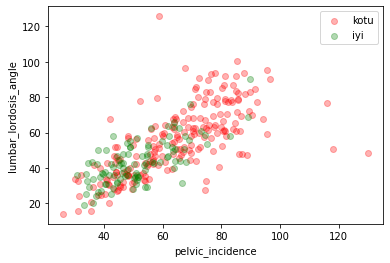

In [ ]:
Abnormal = data[data.pclass == "Abnormal"]
Normal = data[data.pclass == "Normal"]
# scatter plot
plt.scatter(Abnormal.	pelvic_incidence,Abnormal.lumbar_lordosis_angle,color="red",label="kotu",alpha= 0.3)
plt.scatter(Normal.	pelvic_incidence,Normal.lumbar_lordosis_angle,color="green",label="iyi",alpha= 0.3)
plt.xlabel("pelvic_incidence")
plt.ylabel("lumbar_lordosis_angle")
plt.legend()
plt.show()

In [ ]:
data.pclass = [1 if each == "Abnormal" else 0 for each in data.pclass]
y = data.pclass.values
x_data = data.drop(["pclass"],axis=1)


In [ ]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [ ]:
x

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173
...,...,...,...,...,...,...
305,0.209822,0.360293,0.196881,0.193591,0.509380,0.015858
306,0.268009,0.487194,0.136211,0.183674,0.476223,0.024761
307,0.340438,0.522443,0.287897,0.234907,0.597796,0.019437
308,0.184257,0.272352,0.246846,0.214623,0.521175,0.026240


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)
print(x_test)

     pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
78           0.397976             0.428632               0.412956   
244          0.355673             0.605342               0.336533   
185          0.629986             0.554829               0.631992   
70           0.447628             0.427603               0.340068   
120          0.275773             0.333115               0.241627   
..                ...                  ...                    ...   
5            0.136009             0.365744               0.099559   
248          0.204191             0.270218               0.192946   
38           0.286397             0.632335               0.301502   
258          0.136965             0.299172               0.214491   
112          0.153092             0.000000               0.482359   

     sacral_slope  pelvic_radius  degree_spondylolisthesis  
78       0.338718       0.441360                  0.102923  
244      0.206576       0.477737                 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 13) # n_neighbors = k
knn.fit(x_train,y_train)
knn.predict(x_test)
knn.score(x_test, y_test)


0.7849462365591398

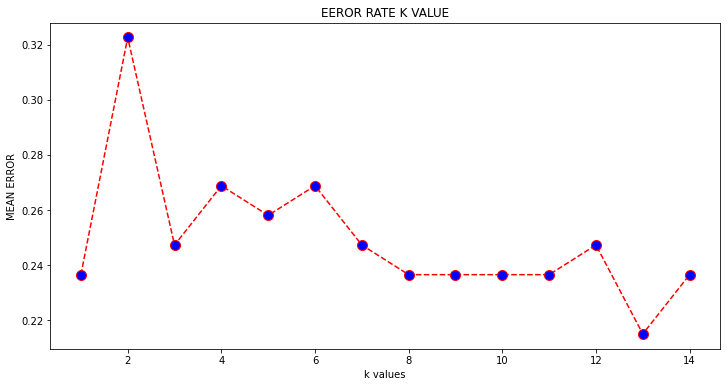

In [ ]:
error = []
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error.append(np.mean(pred_i !=y_test))

plt.figure(figsize=(12,6)) 
plt.plot(range(1,15),error, color='red',linestyle='dashed',marker='o' , markerfacecolor='blue', markersize=10)
plt.title('EEROR RATE K VALUE')
plt.xlabel("k values")
plt.ylabel("MEAN ERROR")
plt.show()